[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W5/HW3.ipynb)

###Run the below cells, there are some functions to be used!

In [28]:
import numpy as np
import scipy as sp
import statsmodels
import pandas as pd
from matplotlib import pyplot as plt

In [29]:
!apt-get install r-base
!pip install rpy2
###Above we are pip installing a bridge between r and pyhton
import rpy2 # import rpy2's package module
from rpy2.robjects.packages import importr
utils = importr('utils')
import rpy2.robjects.packages as rpackages
utils.install_packages("TSA")
# import R's utility package
utils = rpackages.importr('TSA')  ### Time series analysis lib. is to be imported
import rpy2.robjects as robjects
r = robjects.r
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.1-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


(as ‘lib’ is unspecified)







	‘/tmp/RtmpjmfxO9/downloaded_packages’



#The following function downloads the data set that you will experiment with! The file will be downloaded directly as a csv file, so you do not need call any other function except pd.read_csv (google this).

In [30]:
def download_ts():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Tedu_Time_Series/main/W5/data_setforHW3.csv"
  res = requests.get(url, allow_redirects=True)
  with open('data_setforHW3.csv','wb') as file:
    file.write(res.content)
  print("Dataset downloaded!")
download_ts()

Dataset downloaded!


In [31]:
data = pd.read_csv("data_setforHW3.csv")  #### do not forget to pick the right column here! hint: iloc

In [32]:
def see_significance_values(x = None): ### we will use this function for illustration purpossses.
  print(pd.DataFrame(np.array(list(x.items())[0][1])))

#Things to do:

1.   Sketch the series, and see if something is wrong use: plt.plot,
2.   Use extended autocorrelation function to see which orders of AR and MA you will pick.  For this you need to look at last week's lab files to sketch eacf table. Examine eacf table carefully!, call your extended autocorrelation function m as we did in labs, and call the function see_significance_values(m), to do comparison.
3. Fit the model with the ar-ma orders that you come up with.
4. Justify your answer by a) comparing in sample predictions and the real time series  b) performing Ljhung-Box test the see if residuals exhibit some serial correlation (do not forget to set model_df = ar_order + ma_order that you have picked!).

Empty DataFrame
Columns: [404: Not Found]
Index: []
Time series data shape: (0,)


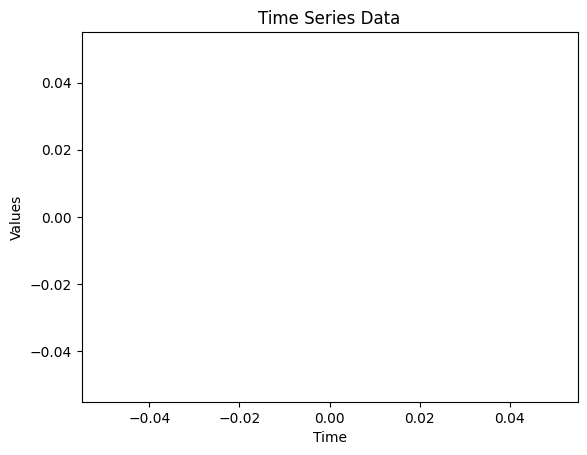

named integer(0)


  'ts' object must have one or more observations

  only 0's may be mixed with negative subscripts



Error converting to time series: Error in ts(r_time_series) : 
  'ts' object must have one or more observations

Error calculating EACF: Error in z[1:(length(z) - lag)] : 
  only 0's may be mixed with negative subscripts

time_series_data is empty. Skipping ARIMA model fitting.


In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA

r('if(!require(TSA)){install.packages("TSA")}')
r('library(TSA)')

data = pd.read_csv("data_setforHW3.csv")
print(data.head())

time_series_data = pd.to_numeric(data.iloc[:, 0], errors='coerce').dropna()
print("Time series data shape:", time_series_data.shape)

plt.plot(time_series_data)
plt.title("Time Series Data")
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

r_time_series = pandas2ri.py2rpy(time_series_data)

robjects.globalenv['r_time_series'] = r_time_series
r('print(r_time_series)')

try:
    r('r_time_series <- ts(r_time_series)')
except Exception as e:
    print("Error converting to time series:", e)

try:
    r('eacf_table <- eacf(r_time_series)')
    m = r('eacf_table')
    see_significance_values(x=m)
except Exception as e:
    print("Error calculating EACF:", e)

ar_order = 1
ma_order = 1

if len(time_series_data) > 0:
    model = ARIMA(time_series_data, order=(ar_order, 0, ma_order))
    model_fit = model.fit()
    print(model_fit.summary())

    plt.plot(time_series_data, label="Actual")
    plt.plot(model_fit.fittedvalues, color="red", label="Fitted")
    plt.legend()
    plt.title("In-Sample Predictions vs Actual")
    plt.show()

    lb_test = acorr_ljungbox(model_fit.resid, lags=[10], model_df=ar_order + ma_order)
    print("Ljung-Box Test Results:")
    print(lb_test)
else:
    print("time_series_data is empty. Skipping ARIMA model fitting.")


###Congrats!!!, you reached the end of HW3, now go to File-> Download -> Download .ipynb.
##Save the file and upload it to LMS system. Grab a cup of coffee, and do some la dolce vita.